1- Import Libraries and Dataset

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [47]:
df=pd.read_csv('car data.csv') #import data set
#df-data frame
#pd - pandas
#read_csv - for csv filr (can be changed)

2- Dataset Overview

In [48]:
df.head()
#1st data set (5 raws)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [49]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [51]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

3- Data Preprossening

remove the Car_Name column because the car name does not affect the analysis

In [52]:
df= df.drop(columns='Car_Name')

change year column in to age. 

In [53]:
df2= df.copy()
df2= df2.drop(columns='Year')
for i in range(len(df)):
    df2['Age']= df['Year'].max()+1-df['Year']
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5


Clear outliers

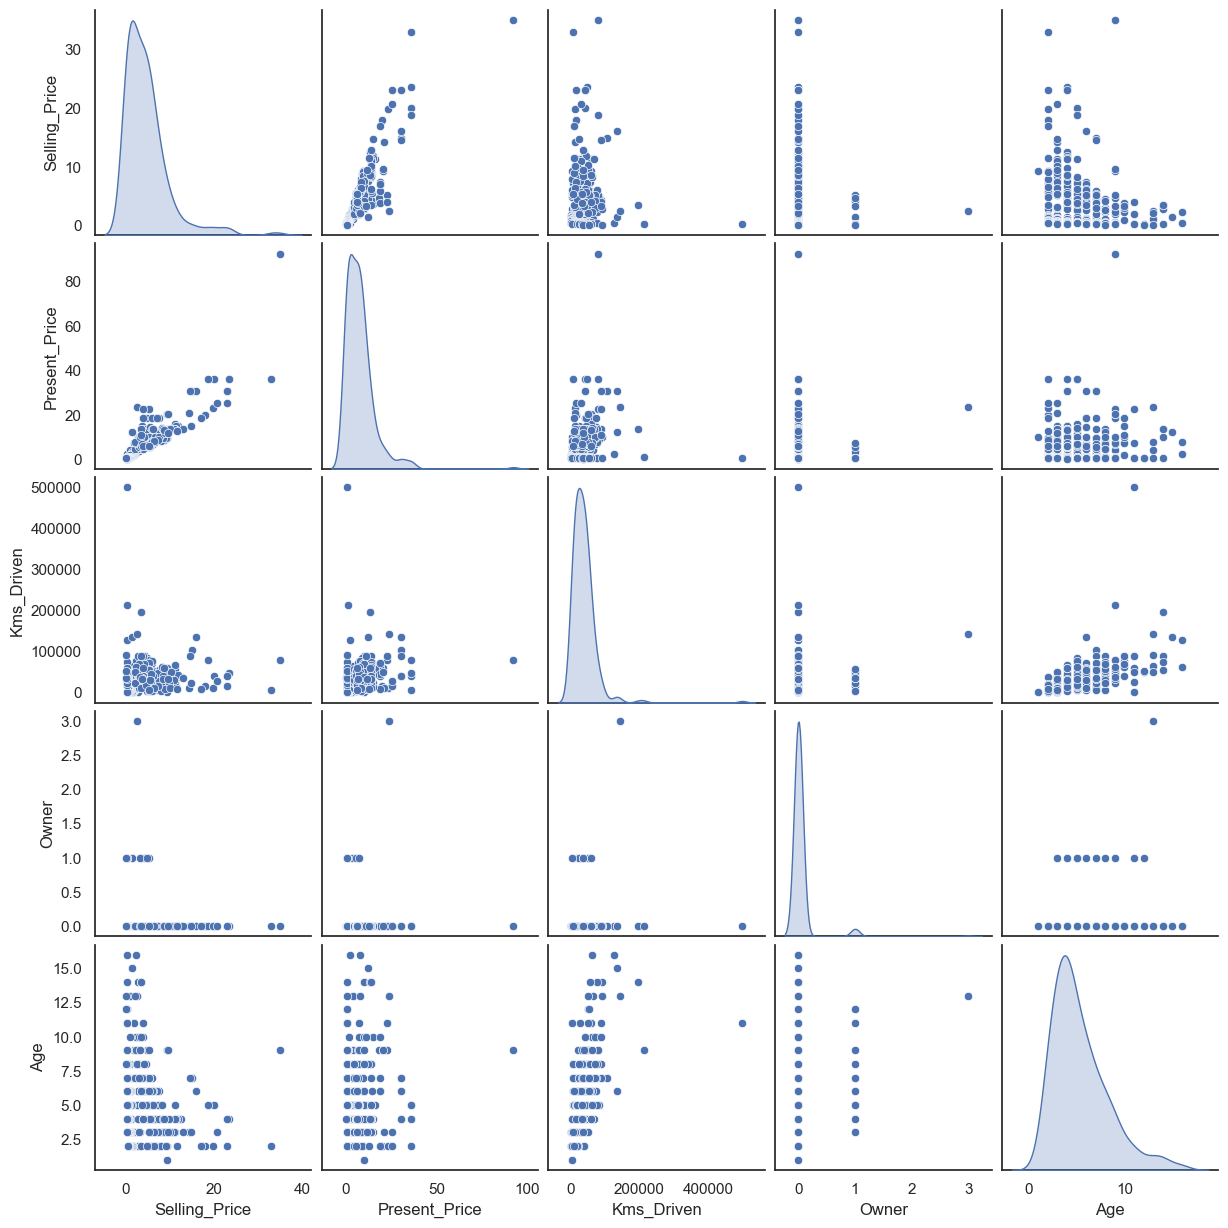

In [54]:
sns.pairplot(df2, diag_kind='kde')

In [55]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [56]:
df2.shape

(301, 8)

In [57]:
df_clean01 = remove_outliers_iqr(df2, 'Present_Price')  
df_clean01.shape

(287, 8)

In [58]:
df_clean02 = remove_outliers_iqr(df_clean01, 'Selling_Price')  
df_clean02.shape

(283, 8)

In [59]:
df_clean03 = remove_outliers_iqr(df_clean02, 'Kms_Driven')  
df_clean03.shape

(278, 8)

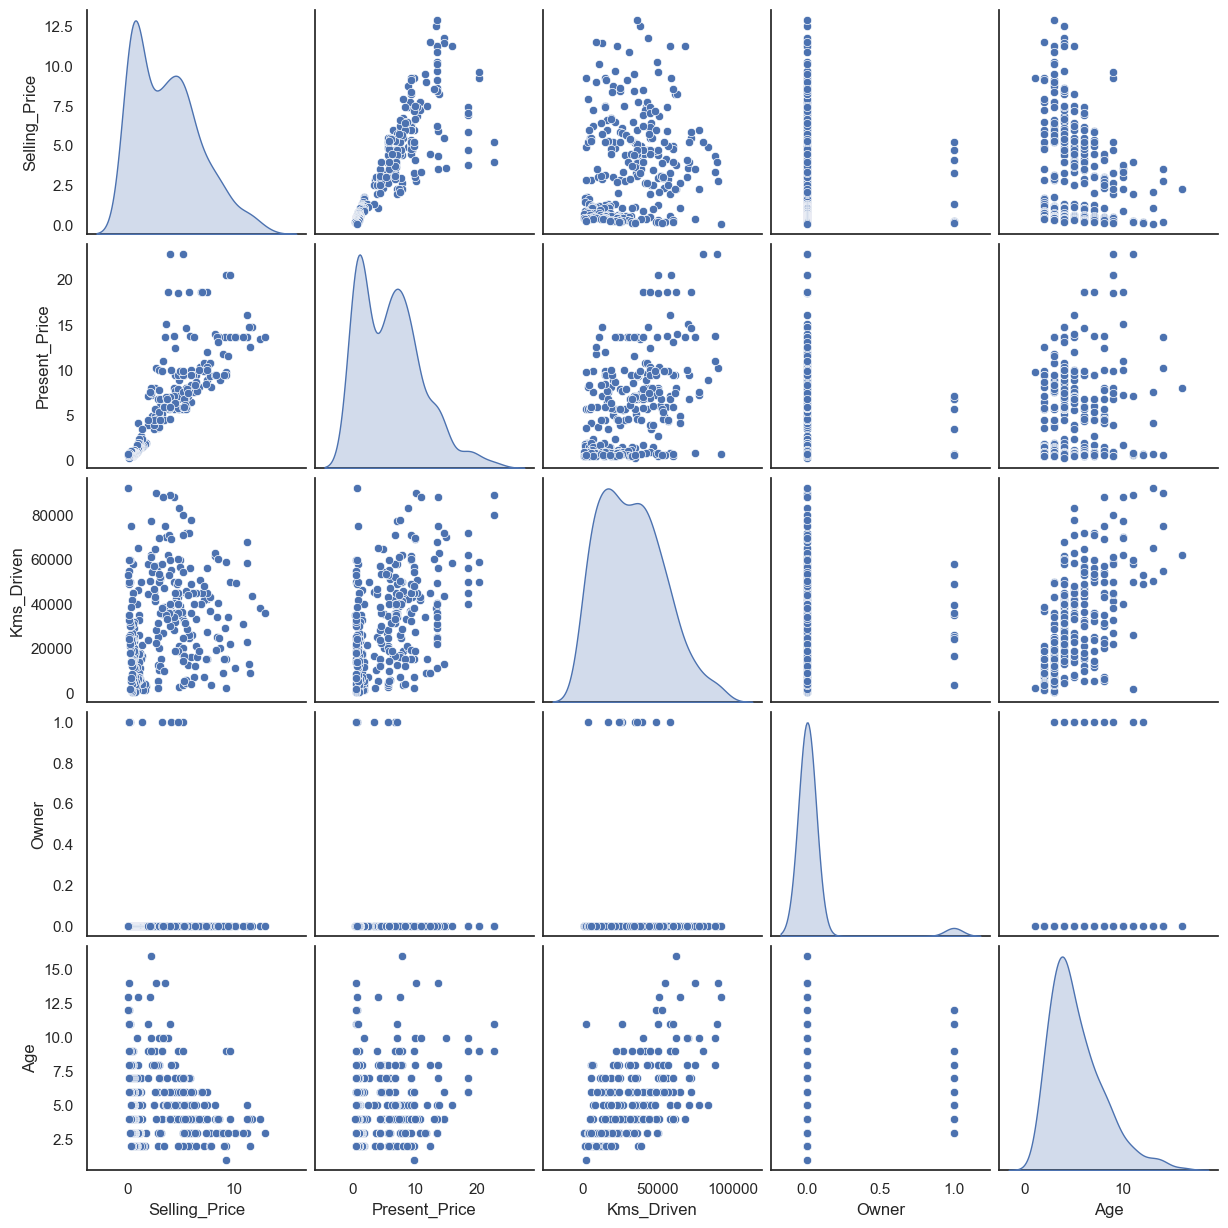

In [60]:
sns.pairplot(df_clean03, diag_kind='kde')

Data Visualization

In [61]:
df3 = df_clean03.copy()

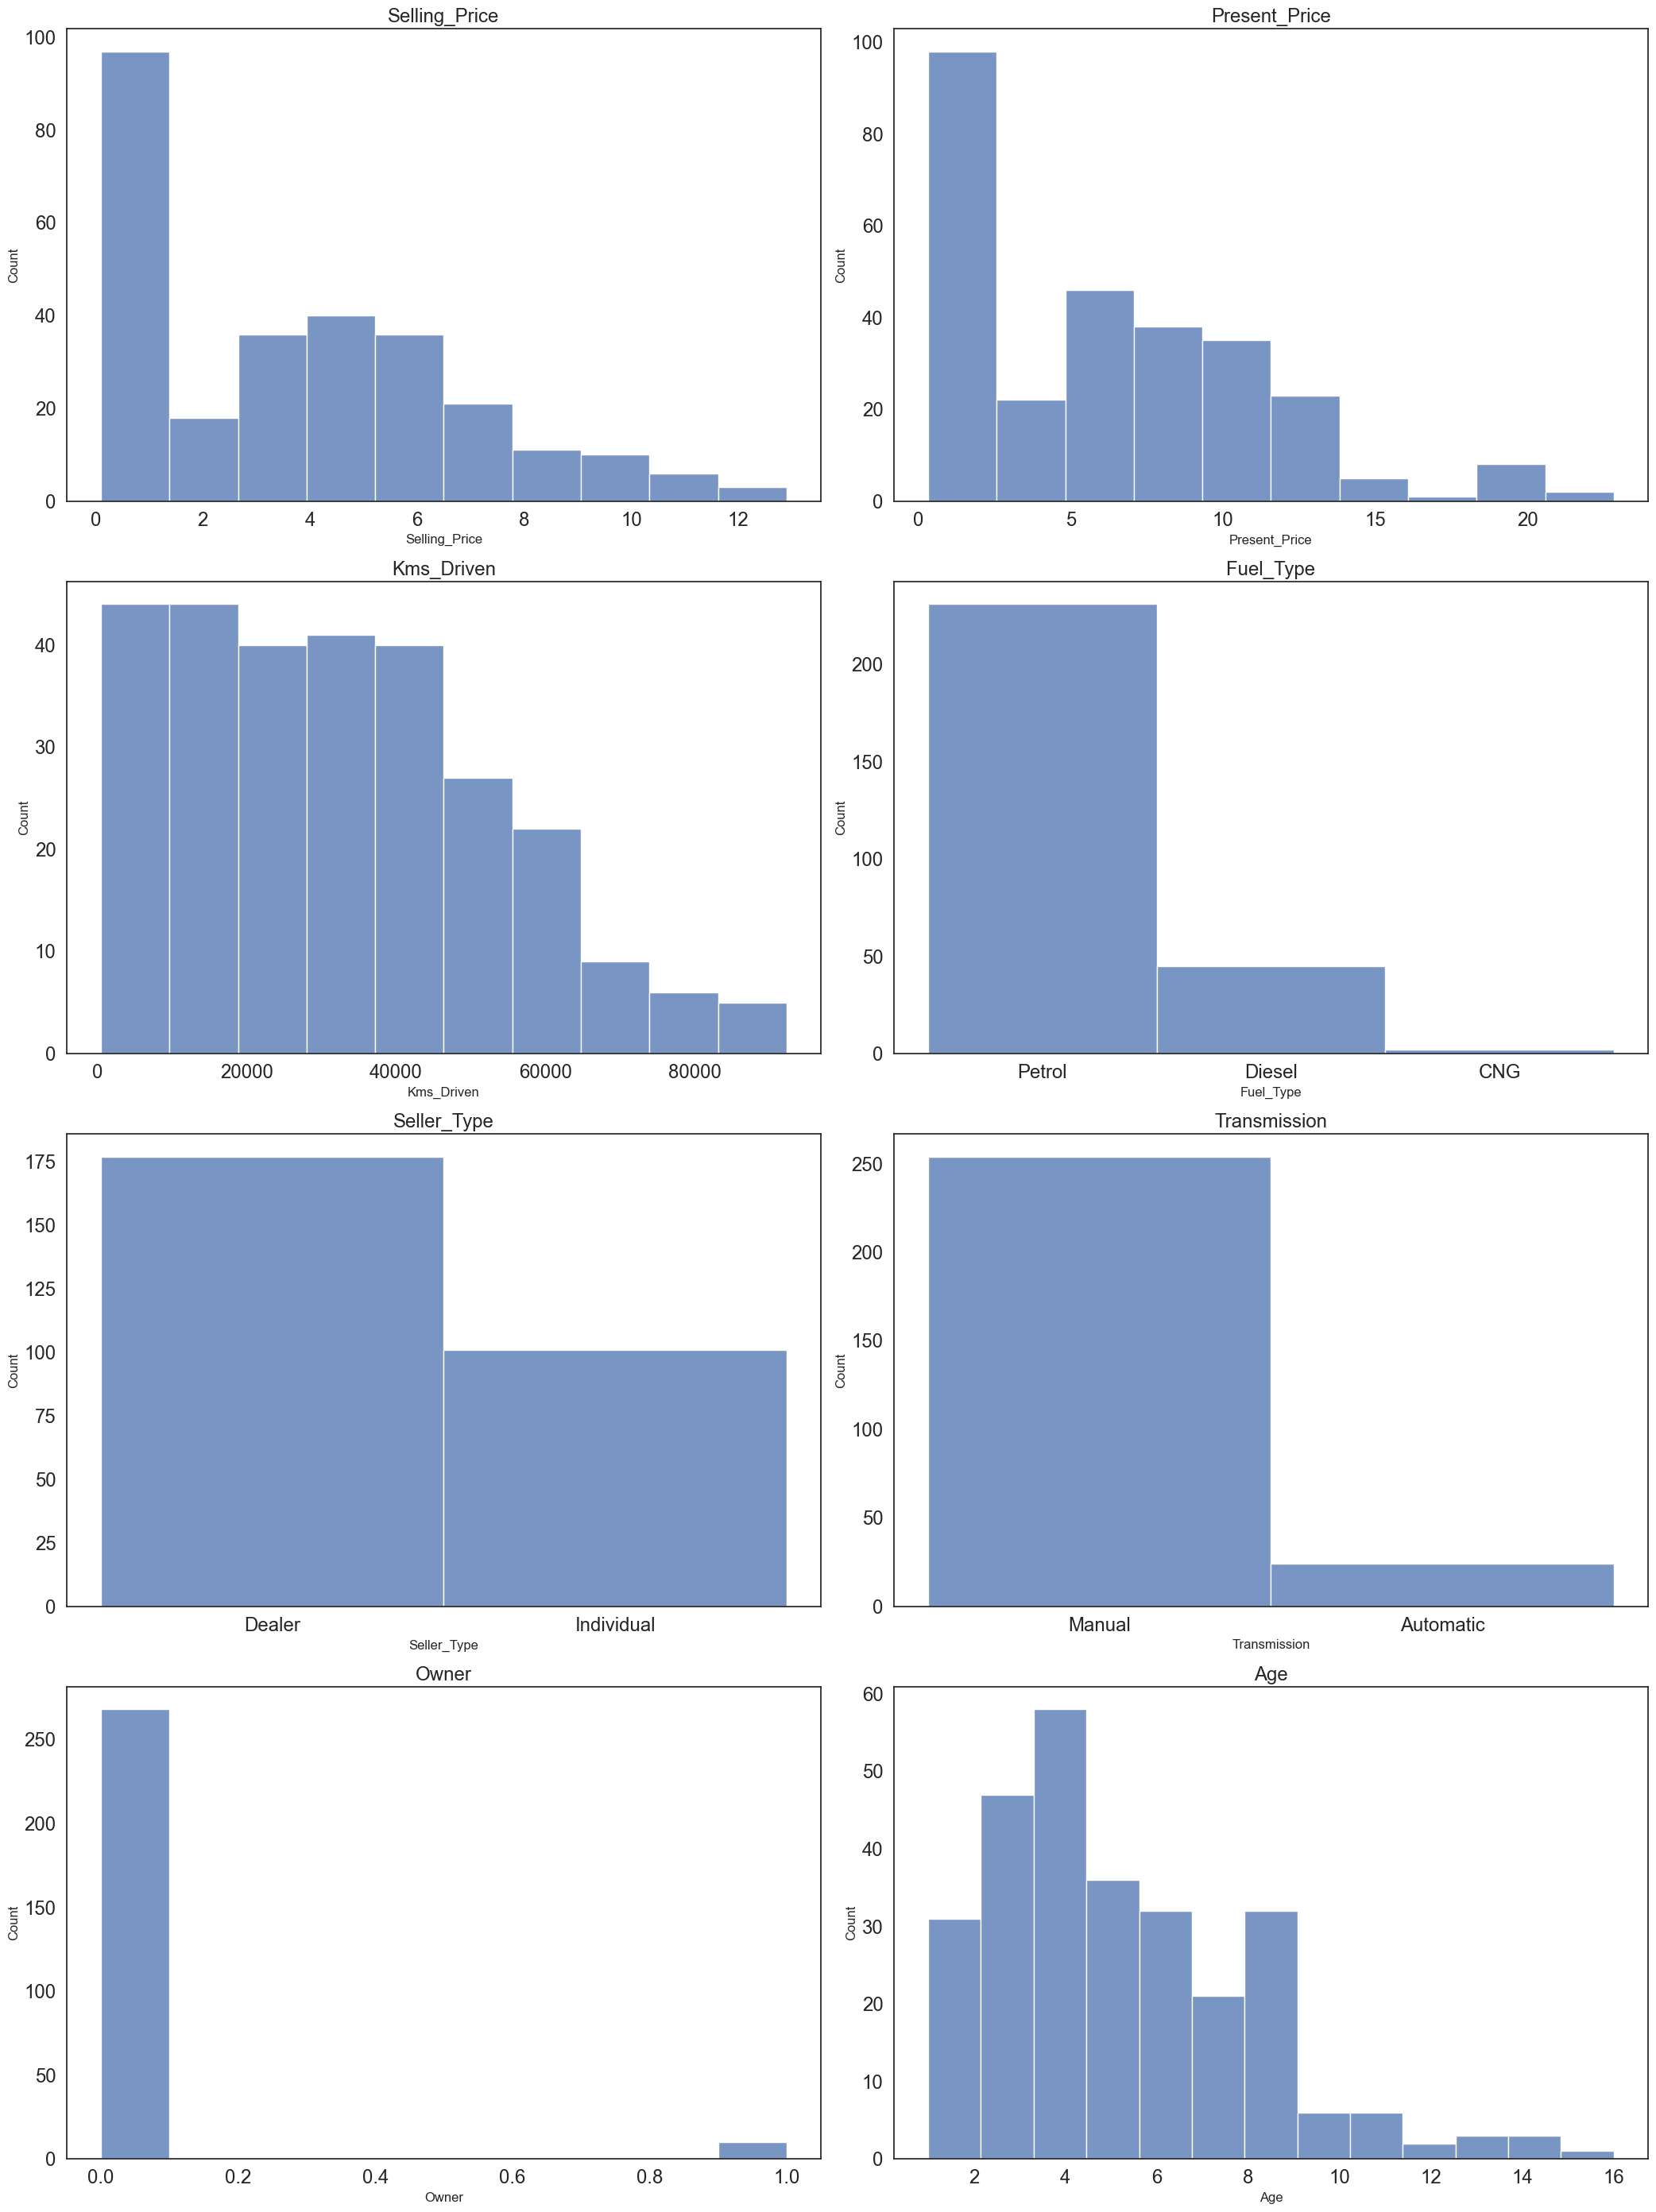

In [62]:
plt.figure(figsize=(21, 28))  

for i, col in enumerate(df3.columns):
    plt.subplot(4, 2, i + 1) 
    sns.histplot(x=df3[col])
    plt.title(f'{col}', size='x-large')
    plt.xticks(size='x-large')
    plt.yticks(size='x-large')


plt.tight_layout() 
plt.show() 

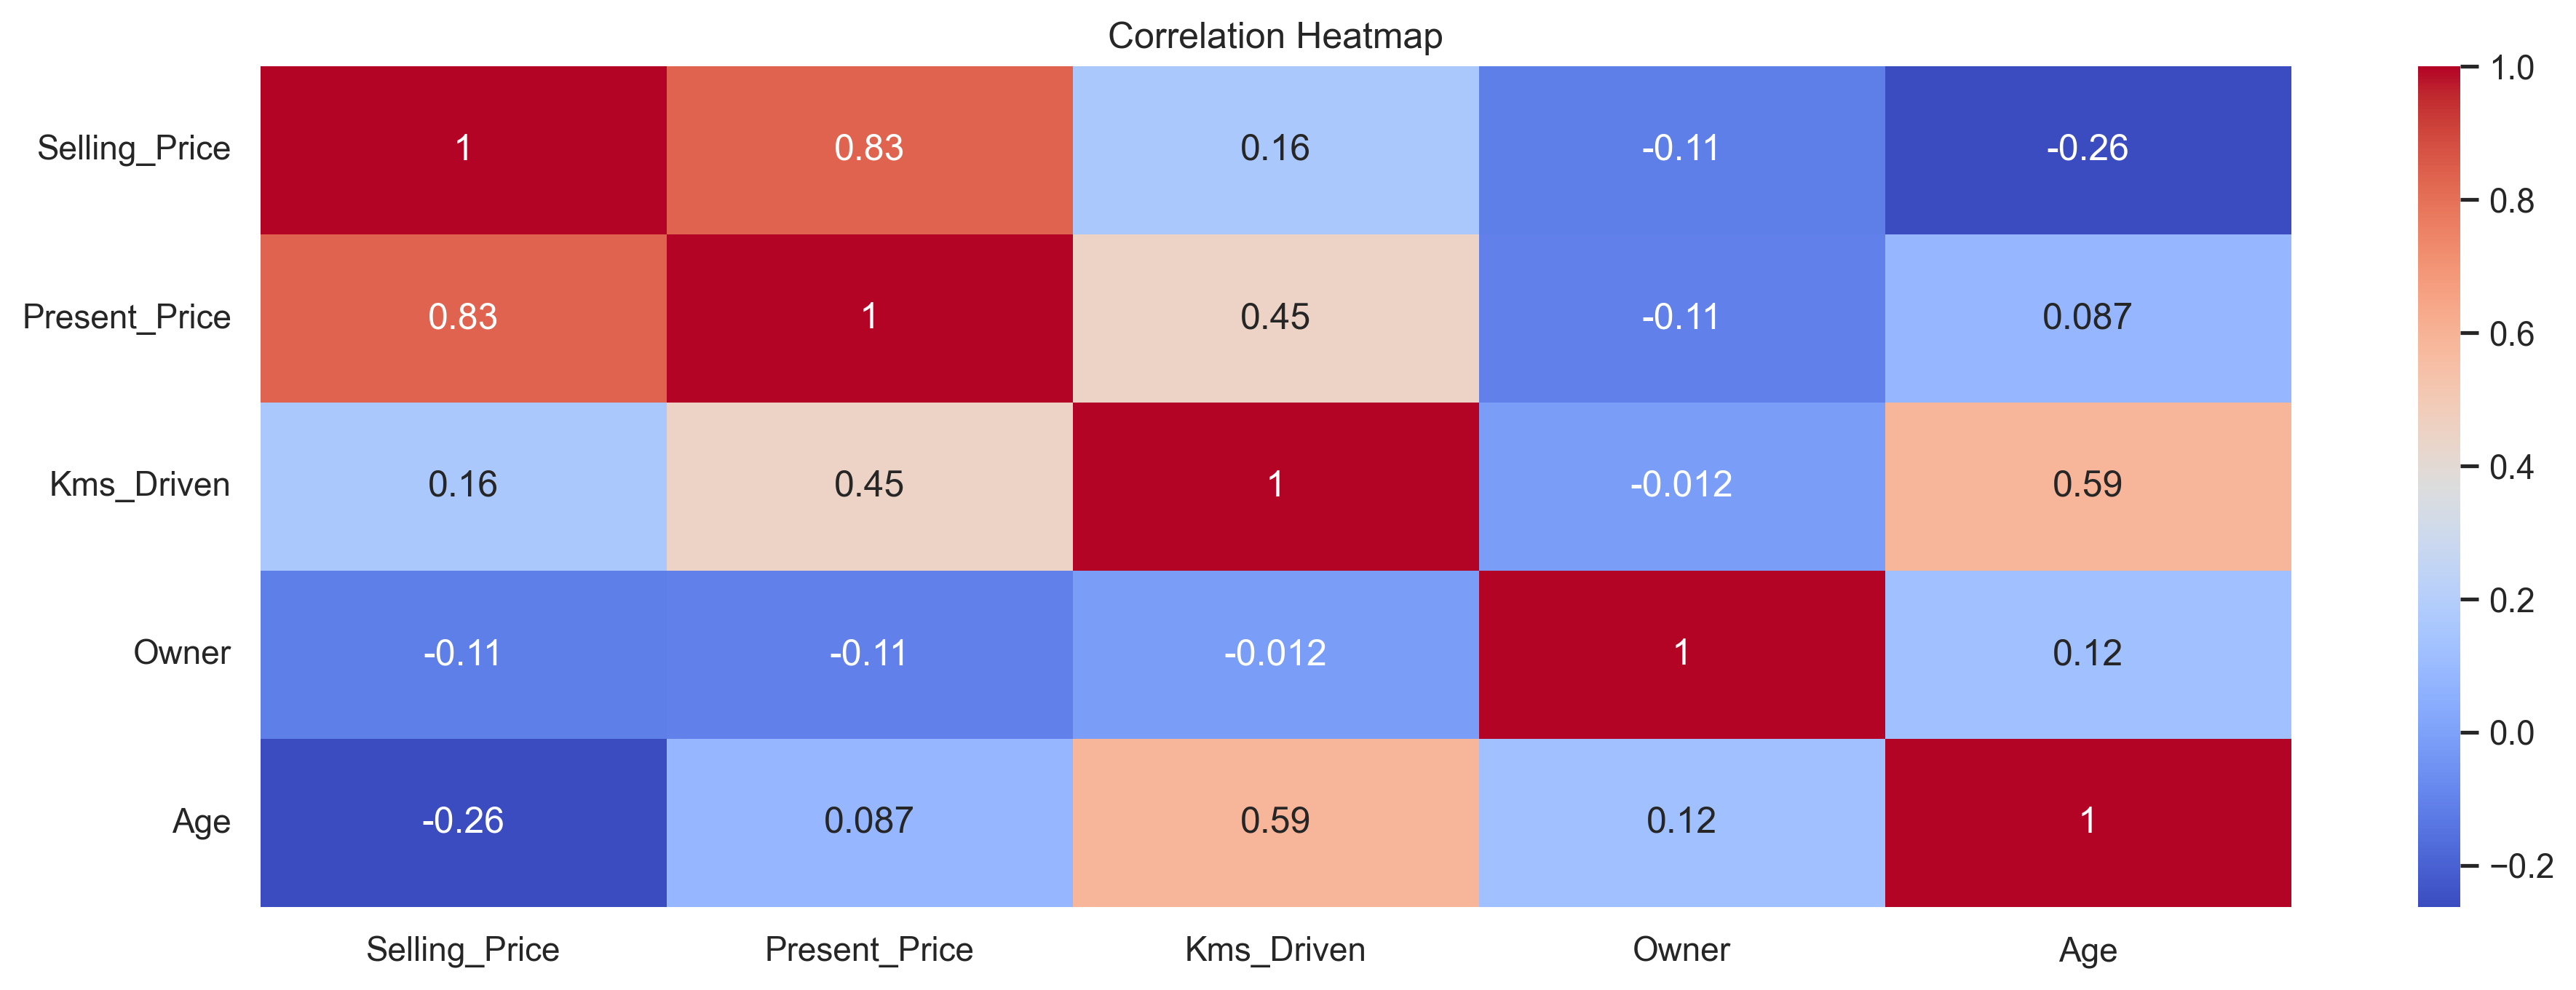

In [63]:
df4= df3.drop(columns=['Fuel_Type', 'Seller_Type', 'Transmission'])

plt.figure(figsize=(15, 5),dpi=300)
sns.set_theme(style='white')
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Convert discrete data to continuous data

In [64]:
df3.Fuel_Type.value_counts()

Fuel_Type
Petrol    231
Diesel     45
CNG         2
Name: count, dtype: int64

In [65]:
df3.Seller_Type.value_counts()

Seller_Type
Dealer        177
Individual    101
Name: count, dtype: int64

In [66]:
df3.Transmission.value_counts()

Transmission
Manual       254
Automatic     24
Name: count, dtype: int64

In [67]:
# One-hot encode categorical columns
df3 = pd.get_dummies(df3, columns=['Fuel_Type', 'Seller_Type', 'Transmission'] , drop_first=True, dtype=int)
df3.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,5,0,1,0,1
1,4.75,9.54,43000,0,6,1,0,0,1
2,7.25,9.85,6900,0,2,0,1,0,1
3,2.85,4.15,5200,0,8,0,1,0,1
4,4.60,6.87,42450,0,5,1,0,0,1


4- Create models

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
X= df3.drop('Selling_Price', axis=1)
y=df3['Selling_Price']


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

In [71]:
# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predictions
y_pred = model.predict(X_test)

In [73]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Model Coefficients: [ 4.02808816e-01 -2.03810613e-05  3.71707808e-01 -2.88659471e-01
  2.23163753e+00  6.25279645e-01 -1.49104160e+00  1.66225674e-01]
Intercept: 2.994322166007712
Mean Squared Error (MSE): 1.05413818584455
R-squared (R²): 0.8780521262741844


Linear model with X2 for parameters

In [74]:
from sklearn import metrics

def evaluateX2(degree):
    R2 = 0.8780521262741844  
    X_poly = X.copy()  # Work on a copy to avoid modifying the original data
    best_model = None

    for i in X.columns:
        Newcolumn_name = i + str(degree)
        newcolumn_value = X_poly[i] ** degree
        
        # Add the new polynomial column
        X_poly[Newcolumn_name] = newcolumn_value

        # Split the data and train the model
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=1)
        New_model = LinearRegression()
        New_model.fit(X_train, y_train)
        y_pred = New_model.predict(X_test)
        
        # Calculate new R² score
        R2_new = metrics.r2_score(y_test, y_pred)

        # Keep or drop the column based on R² score
        if R2_new < R2:
            X_poly.drop([Newcolumn_name], axis=1, inplace=True)
        else:
            R2 = R2_new
            best_model = New_model
            
    print('Final R² = ', R2)
    
    # Return the trained model and the transformed features
    return best_model, X_poly


In [75]:
# Test for quadratic features
New_model, X_poly = evaluateX2(3)

Final R² =  0.8988286403142943


In [76]:
# Test for quadratic features
New_model, X_poly = evaluateX2(2)

Final R² =  0.9031930811162667


5- Result Plots

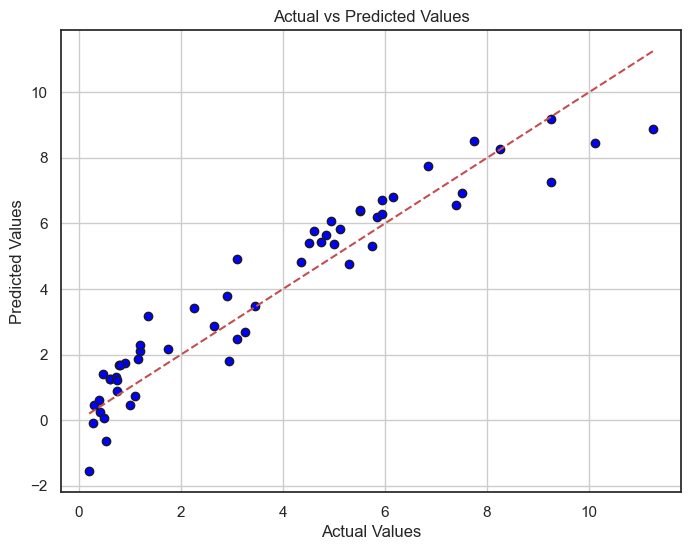

In [77]:
# Split the final transformed data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=1)

# Predict on the test set
y_pred = New_model.predict(X_test)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.show()

6- Predict New Data

In [83]:
def prepare_input_data(new_data, X_poly, degree):
    # Copy the input data to avoid modifying the original
    new_data_transformed = new_data.copy()

    # Add polynomial features based on the trained feature set
    for col in X_poly.columns:
        if col in new_data.columns:
            # Create the polynomial features for the specified degree
            for d in range(2, degree + 1):
                new_data_transformed[col + str(d)] = new_data[col] ** d

    # Match the columns with the transformed training data
    new_data_transformed = new_data_transformed[X_poly.columns]

    return new_data_transformed

# Prepare the input data
new_data = pd.DataFrame({
    'Present_Price': [5.59],
    'Kms_Driven': [27000],
    'Owner': [0],
    'Age': [5],
    'Fuel_Type_Diesel': [0],
    'Fuel_Type_Petrol': [1],
    'Seller_Type_Individual': [0],
    'Transmission_Manual': [1]
})

# Transform the new data to match the training features
new_data_transformed = prepare_input_data(new_data, X_poly, 3)

# Make the prediction
predicted_price = New_model.predict(new_data_transformed)

# Print the predicted selling price
print('Predicted Selling Price:', predicted_price[0])


Predicted Selling Price: 3.8339912155909386


In [84]:
# Calculate and print the R² score for the final trained model
y_pred_test = New_model.predict(X_test)
R2_score = metrics.r2_score(y_test, y_pred_test)

print('R² for the final model:', R2_score)


R² for the final model: 0.9031930811162667
